In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [3]:
bike = pd.read_csv ("TEST.csv")

In [4]:
bike.head()

,wkday_ct,wkend_ct,TrafDir,BikeInfra,SegNum,StLength,Rd_Wd,Pop_Den,AMI,pct_CR,pct_IM,pct_M,pct_OS,pct_R,pct_U,Prox
0,139,120,0,0,30,10891,60,17.08,129806.0,0.03,0.12,0.15,0.04,0.24,0.42,5981
1,95,73,0,0,20,7364,60,9.05,117379.5,0.04,0.34,0.09,0.16,0.12,0.26,4549
2,24,12,0,0,9,2792,60,3.43,123250.0,0.29,0.01,0.28,0.00,0.00,0.41,2058
3,873,566,1,1,79,18112,75,8.00,33863.5,0.00,0.49,0.01,0.00,0.00,0.51,3854
4,1385,1303,1,0,145,24855,80,17.28,67085.0,0.57,0.00,0.10,0.00,0.01,0.33,1092


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = np.asarray(bike[['SegNum', 'BikeInfra']])
Y = np.asarray(bike['wkday_ct'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, shuffle= True)

In [8]:
lineReg = LinearRegression()

In [9]:
lineReg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
print('Intercept: ', lineReg.score(X, Y))
print('Coefficients: ', lineReg.coef_)

Intercept:  0.20667928687165316
Coefficients:  [  1.35313392 207.94836443]


In [11]:
results = lineReg.fit(X_train, y_train)

In [12]:
print('Intercept: ', lineReg.score(X_test, y_test))
print('Coefficients: ', lineReg.coef_)

Intercept:  0.06951069607982252
Coefficients:  [  1.35722498 337.42118782]


In [13]:
lineReg.score(X_train,y_train)

0.4059457741364151

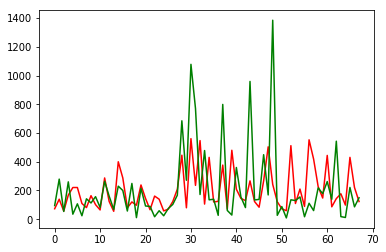

In [14]:
plt.plot(lineReg.predict(X_test), c= 'red', label = 'Predicted Counts' )
plt.plot(y_test, c= 'green')
plt.show()

In [15]:
print (lineReg.predict(X_test))

[ 72.72844878 139.23247292  56.44174899 167.73419755 220.66597187
 220.66597187 109.37352331  80.87179868 163.66252261 101.23017341
  64.58509889 287.16999601 122.94577313  55.08452401 399.81966955
 287.16999601  79.51457369 120.23132317  97.15849847 238.30989664
 144.66137285  65.94232387 160.94807264 139.23247292  57.79897397
  70.01399882 122.94577313 208.45094703 445.43748615  79.51457369
 560.80160966 235.59544668 547.22935983 105.30184836 430.50801134
 120.23132317 124.30299811 376.74684485  71.3712238  479.89594352
 208.45094703 144.66137285 129.73189804 266.81162127 122.94577313
  83.58624864 266.81162127 503.79816039 242.38157159 121.58854815
  72.72844878  59.15619896 511.94151029 109.37352331 209.80817201
  89.01514857 552.65825976 418.82081931 227.45209678 147.37582282
 444.08026116  86.30069861 143.30414787 177.23477243  98.51572345
 430.50801134 220.66597187 122.94577313]


# Ridge Regression

In [16]:
from sklearn import linear_model
reg = linear_model.Ridge (alpha = 0.05)


In [17]:
reg.fit(X_train, y_train)
print('Intercept: ', reg.score(X_test, y_test))
print('Coefficients: ', reg.coef_)


Intercept:  0.07228760209219198
Coefficients:  [  1.36146475 333.2080185 ]


In [18]:
reg.score(X_train,y_train)

0.4059135604736419

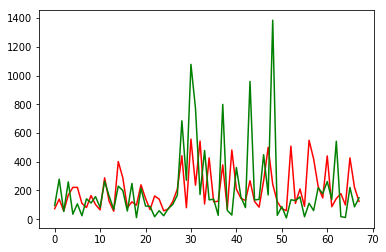

In [19]:
plt.plot(reg.predict(X_test), c= 'red', label = 'Predicted Counts')
plt.plot(y_test, c= 'green')
plt.show()

# Lasso Regression

In [20]:
from sklearn import linear_model
lasso = linear_model.Lasso (alpha = 0.05)


In [21]:
lasso.fit(X,Y)


Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
lasso.score(X_train,y_train)

0.37401826775611136

In [23]:
print('Intercept: ', lasso.score(X_test, y_test))
print('Coefficients: ', lasso.coef_)


Intercept:  0.12836118904373528
Coefficients:  [  1.35323033 207.54600386]


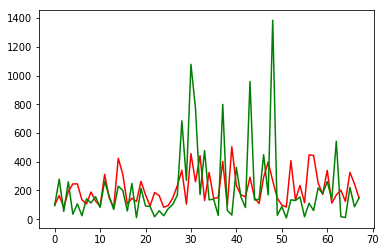

In [24]:
plt.plot(lasso.predict(X_test), c= 'red', label = 'Predicted Counts')
plt.plot(y_test, c= 'green')
plt.show()

# Checking with 1000 iterations

In [25]:
Intercept = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = LinearRegression()
    lineReg.fit(X_train, y_train)
    Intercept.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('Linear Regression')
print(np.mean(Intercept))
print(np.mean(coefs, axis=0))


Linear Regression
-0.054493075413398005
[  1.38126768 205.48076045]


In [26]:

Intercept = []
coefs = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, shuffle= True)
    lineReg = linear_model.Ridge (alpha = 0.05)
    lineReg.fit(X_train, y_train)
    Intercept.append(lineReg.score(X_test, y_test))
    coefs.append(lineReg.coef_)
print('\nRidge Regression')
print(np.mean(Intercept))
print(np.mean(coefs, axis=0))


Ridge Regression
-0.04873505108749588
[  1.38953059 205.60958062]
